In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

In [2]:
# Load data
file_path = 'train/'
data_lst = []
for filename in os.listdir(file_path):
    if 'dog' not in filename and 'cat' not in filename:
        continue
    real_file_path = file_path + filename
    img = Image.open(real_file_path)
    img = img.resize((64, 64))
    data = np.array(img)
    data = data.reshape(64*64*3, 1)
    if 'cat' in filename:
        data_lst.append((data, 1, img))
    elif 'dog' in filename:
        data_lst.append((data, 0, img))

In [3]:
X_lst = list(data_lst[i][0] for i in range(len(data_lst)))
Y_lst = list(data_lst[i][1] for i in range(len(data_lst)))
img_lst = list(data_lst[i][2] for i in range(len(data_lst)))

In [4]:
# Convert Python list to numpy array
X = np.array(X_lst)
Y = np.array(Y_lst)

In [5]:
# Convert to array with correct dimensions
X = X.reshape(X.shape[0], X.shape[1])
Y = Y.reshape(Y.shape[0], 1)
X = X.T
Y = Y.T
print('X.shape:', X.shape)
print('Y.shaoe:', Y.shape)

X.shape: (12288, 1002)
Y.shaoe: (1, 1002)


In [6]:
# Normalization
min_X = np.min(X)
max_X = np.max(X)
X = (X - min_X)/(max_X - min_X)

In [7]:
# You should see 5530865.372549014 or 5531484.431372557
# (Don't worry if value deviates from this)
print(np.sum(X))

5530865.372549014


In [21]:
# Initializing parameters of a 2-layer neural network
np.random.seed(0)
N0, m = X.shape
N1 = 10
N2 = 1
# Initialize W1
W1 = np.random.rand(N0, N1) - 0.5
# Initialize B1
B1 = np.random.rand(N1, 1) - 0.5
# Initialize W2
W2 = np.random.rand(N1, N2) - 0.5
# Initialize B2
B2 = np.random.rand(N2, 1) - 0.5

In [22]:
# You should see 32.838553644951105
print(np.sum(W1))

32.838553644951105


In [23]:
# You should see -1.0433989293244808
print(np.sum(B1))

-1.0433989293244808


In [24]:
# You should see -0.4229774016622794
print(np.sum(W2))

-0.4229774016622794


In [25]:
# You should see -0.4841141325352224
print(np.sum(B2))

-0.4841141325352224


In [26]:
#################### Training ####################
alpha = 0.02
print_every = 500
cost_history = []
for epoch in range(6000):
    
    # Forward Pass
    # TODO:
    K1 = W1.T.dot(X) + B1
    A1 = np.maximum(0, K1)
    K2 = W2.T.dot(A1) + B2
    H = 1/(1+np.exp(-K2))
    J = (1/m) * np.sum(-(Y*np.log(H)+(1-Y)*np.log(1-H)))
    #print(epoch)
    if epoch % print_every == 0:
        print('Cost :', J)
        cost_history.append(J)
    # Backward Pass
    # TODO:
    dK2 = (1/m) * np.sum(H-Y, axis=0, keepdims= True)
    dW2 = A1.dot(dK2.T)
    dB2 = np.sum(dK2, axis=1, keepdims=True)

    dA1 = W2.dot(dK2)
    dK1 = dA1*np.where(K1 > 0 , 1,0)
    dW1 = X.dot(dK1.T)
    dB1 = np.sum(dK1, axis=1, keepdims=True)

    # Updates
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    # TODO:
    

Cost : 4.424046966453417
Cost : 0.6849643432413912
Cost : 0.671555755923637
Cost : 0.655628045588206
Cost : 0.6368039035337788
Cost : 0.6183369110005166
Cost : 0.5987444409791776
Cost : 0.5789738504545413
Cost : 0.5588571792301286
Cost : 0.5380932050107683
Cost : 0.5171064036261142
Cost : 0.4948509556570999


Text(0.5, 1.0, 'Costs over iterations')

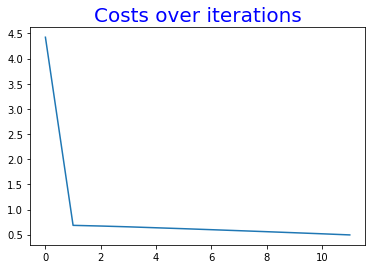

In [27]:
plot_x = list(range(len(cost_history)))
plot_y = cost_history
plt.plot(plot_x, plot_y)
plt.title("Costs over iterations", color = 'blue', fontdict = {'fontsize': 20})

In [29]:
count = 0
K1 = np.dot(W1.T, X) + B1
A1 = np.maximum(0, K1)
scores = np.dot(W2.T, A1) + B2
predictions = np.where(scores>0, 1, 0)
acc_arr = np.equal(predictions, Y)
print('Training Acc:', np.sum(acc_arr)/m)

Training Acc: 0.7395209580838323


In [15]:
a = 10

a -= 1

In [17]:
L = 5

for i in range(1,L):
    print(i)

1
2
3
4


In [ ]:
#################### Testing #################### 

In [ ]:
# file_path = 'test/'
# X_test = []
# Y_test = []
# for filename in os.listdir(file_path):
#     if 'cat' not in filename and 'dog' not in filename:
#         continue
#     real_file_path = file_path+filename
#     img = Image.open(real_file_path)
#     img = img.resize((64, 64))
#     arr = np.array(img)
#     arr = arr.reshape(64*64*3, 1)
#     arr = (arr - min_X) / (max_X - min_X)
#     X_test.append(arr)
#     if 'cat' in filename:
#         Y_test.append(1)
#     else:
#         Y_test.append(0)

In [ ]:
# X_test = np.asarray(X_test)
# Y_test = np.asarray(Y_test)
# num_data = 100
# Y_test = Y_test.reshape(1, 100)
# print('Y_test.shape:', Y_test.shape)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
# X_test = X_test.T
# print('X_test.shape:',X_test.shape)

In [ ]:
# K1 = np.dot(W1.T, X_test) + B1
# A1 = np.maximum(0, K1)
# K2 = np.dot(W2.T, A1) + B2
# val_predictions = np.where(K2>0, 1, 0)
# acc_arr = np.equal(val_predictions, Y_test)
# correct = np.sum(acc_arr)

In [ ]:
# print('Number of data:', num_data)
# print('Val Accuracy:', correct/num_data)